# Lab03

## Neural Network 
We are going to implmenet a Neural Network for identifying animal species using features of animals.

In [1]:
import tensorflow as tf
import numpy as np

C:\Users\daiwe\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Let's say we have two features that represnet each: 
1. Does animal has hair? 
2. Does animal has feather?

We would like to predict whether the animal is bird, mammal, or other. 


In [2]:
# [Hair, Feather]
x_data = np.array(
    [[0, 0], [1, 0], [1, 1], [0, 0], [0, 0], [0, 1]])

# [Other, Mammal, Bird]
y_data = np.array([
    [1, 0, 0],  # Other
    [0, 1, 0],  # Mammal
    [0, 0, 1],  # Bird
    [1, 0, 0],  # Other
    [1, 0, 0],  # Mammal
    [0, 0, 1]   # Bird
])

# number of input (features), 2 - Hair, Feather
num_input = 2
# number of output (classes), 3 - Other, Mammal, Bird
num_classes = 3


**But, why One-hot encoding?**
There is no ordinal relationship exists!

### No hidden layer

In [3]:
### Neural Network Model
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

weights = {
    # [Input(Features), Output(Classes)] -> [2, 3]
    'out': tf.Variable(tf.random_normal([num_input, num_classes]))
}
biases = {
    # Let Bias the number of output candidates, which is 3 (number of classes).
    'out': tf.Variable(tf.random_normal([num_classes]))
}

learning_rate=0.01

def neural_network(X):
  # Apply Weight and Bias
  output_layer = tf.add(tf.matmul(X, weights['out']), biases['out'])
    
  return output_layer
    
logits = neural_network(X)

# Calculate cost (error) for the model
cost_op = tf.reduce_mean(
    tf.nn.sigmoid_cross_entropy_with_logits(labels=Y, logits=logits))


# Apply GradientDescent optimiser
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(cost_op)

### Evaluation
# Apply softmax() to have normalised output
# softmax() changes each value to have between 0 and 1, and all values will add up to 1
# softmax = tf.exp(logits) / tf.reduce_sum(tf.exp(logits), axis)
prediction = tf.nn.softmax(logits)

correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

### Train Model
init = tf.global_variables_initializer()
with tf.Session() as sess:
  
  sess.run(init)
  
  no_of_epochs = 2000
  display_interval = 200

  # Every epoch, the model will be modified by the given learning rate
  for epoch in range(no_of_epochs):
    sess.run(train_op, feed_dict={X:x_data, Y:y_data})    
    # every display_interval loop, the training information will be displayed
    if epoch % display_interval == 0 :
      # calculate the cost/accuracy of the current model
      cost, acc = sess.run([cost_op, accuracy], feed_dict={X: x_data,
                                                             Y: y_data})
      print("Epoch " + str(epoch) + ", Cost= " + 
              "{:.4f}".format(cost) + ", Training Accuracy= " + 
              "{:.3f}".format(acc))


### Result
  prediction = tf.argmax(prediction, 1)
  answer = tf.argmax(Y, 1)
  print('Predicted :', sess.run(prediction, feed_dict={X: x_data}))
  print('Answer :', sess.run(answer, feed_dict={Y: y_data}))

  is_correct = tf.equal(prediction, answer)
  accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
  print('Accuracy : %.2f' % sess.run(accuracy * 100, feed_dict={X: x_data, Y: y_data}))


Epoch 0, Cost= 0.7126, Training Accuracy= 0.333
Epoch 200, Cost= 0.6716, Training Accuracy= 0.333
Epoch 400, Cost= 0.6357, Training Accuracy= 0.333
Epoch 600, Cost= 0.6043, Training Accuracy= 0.833
Epoch 800, Cost= 0.5763, Training Accuracy= 0.833
Epoch 1000, Cost= 0.5513, Training Accuracy= 0.833
Epoch 1200, Cost= 0.5287, Training Accuracy= 0.833
Epoch 1400, Cost= 0.5082, Training Accuracy= 0.833
Epoch 1600, Cost= 0.4894, Training Accuracy= 0.833
Epoch 1800, Cost= 0.4721, Training Accuracy= 0.833
Predicted : [0 2 2 0 0 2]
Answer : [0 1 2 0 0 2]
Accuracy : 83.33


### With Hidden Layer

In [4]:
### Neural Network Model

# number of neurons in hidden layer, 
n_hidden_1 = 5

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)


weights = {
    # [Input(Features), Output(number of neurons in hidden layer)] -> [2, 5]
    'w1': tf.Variable(tf.random_uniform([num_input, n_hidden_1], -1., 1.)),
    # [Input(number of neurons in hidden layer), Output(Classes)] -> [5, 3]
    'out': tf.Variable(tf.random_uniform([n_hidden_1, num_classes], -1., 1.))
}
biases = {
    # Let Hidden Layer Bias the number of output candidates, which is 3 (number of neurons in hidden layer).
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    # Let Bias the number of output candidates, which is 3 (number of classes).
    'out': tf.Variable(tf.random_normal([num_classes]))
}

learning_rate=0.01

def neural_network(X):
  # Apply Weight and Bias to each neuron 
  hidden_layer = tf.add(tf.matmul(X, weights['w1']), biases['b1'])

  # Apply ReLU (Activation Function)
  output_layer = tf.matmul( tf.nn.relu(hidden_layer), weights['out']) + biases['out']  
    
  return output_layer
    
logits = neural_network(X)

# Calculate cost (error) for the model
cost_op = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(labels=Y, logits=logits))


# Apply GradientDescent optimiser
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(cost_op)


### Evaluation
# Apply softmax() to have normalised output
# softmax() changes each value to have between 0 and 1, and all values will add up to 1
# i.e.) [8.04, 2.76, -6.52] -> [0.53 0.24 0.23]
# softmax = tf.exp(logits) / tf.reduce_sum(tf.exp(logits), axis)
prediction = tf.nn.softmax(logits)

correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))


### Train Model
init = tf.global_variables_initializer()
with tf.Session() as sess:
  
  sess.run(init)
  
  no_of_epochs = 2000
  display_interval = 200
  
  # Every epoch, the model will be modified by the given learning rate
  for epoch in range(no_of_epochs):
    sess.run(train_op, feed_dict={X:x_data, Y:y_data})    
    # every display_interval loop, the training information will be displayed
    if epoch % display_interval == 0 :
      # calculate the cost/accuracy of the current model
      cost, acc = sess.run([cost_op, accuracy], feed_dict={X: x_data,
                                                             Y: y_data})
      print("Epoch " + str(epoch) + ", Cost= " + 
              "{:.4f}".format(cost) + ", Training Accuracy= " + 
              "{:.3f}".format(acc))


### Result 
  prediction = tf.argmax(prediction, 1)
  answer = tf.argmax(Y, 1)
  print('Predicted :', sess.run(prediction, feed_dict={X: x_data}))
  print('Answer :', sess.run(answer, feed_dict={Y: y_data}))

  is_correct = tf.equal(prediction, answer)
  accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
  print('Accuracy : %.2f' % sess.run(accuracy * 100, feed_dict={X: x_data, Y: y_data}))


Epoch 0, Cost= 0.9729, Training Accuracy= 0.833
Epoch 200, Cost= 0.6996, Training Accuracy= 0.833
Epoch 400, Cost= 0.5150, Training Accuracy= 0.833
Epoch 600, Cost= 0.3885, Training Accuracy= 0.833
Epoch 800, Cost= 0.3025, Training Accuracy= 0.833
Epoch 1000, Cost= 0.2446, Training Accuracy= 1.000
Epoch 1200, Cost= 0.2022, Training Accuracy= 1.000
Epoch 1400, Cost= 0.1698, Training Accuracy= 1.000
Epoch 1600, Cost= 0.1443, Training Accuracy= 1.000
Epoch 1800, Cost= 0.1243, Training Accuracy= 1.000
Predicted : [0 1 2 0 0 2]
Answer : [0 1 2 0 0 2]
Accuracy : 100.00


### Word2Vec on TensorFlow
Let's try to implement Word2Vec with Neural Network with TensorFlow

In [0]:
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# raw data - setences 
sentences = ["he likes cat",
             "he likes dog",
             "he likes animal",
             "dog cat animal",
             "she likes cat",
             "she dislikes dog",
             "cat likes fish",
             "cat likes milk",
             "dog likes bone",
             "dog dislikes fish",
             "dog likes milk",
             "she likes movie",
             "she likes music",
             "he likes game",
             "he likes movie",
             "cat dislikes dog"]

# convert all sentences to unique word list
word_sequence = " ".join(sentences).split()
word_list = " ".join(sentences).split()
word_list = list(set(word_list))

# make dictionary so that we can be reference each index of unique word
word_dict = {w: i for i, w in enumerate(word_list)}

# Making window size 1 skip-gram
# i.e.) he likes cat
#   -> (he, [likes]), (likes,[he, cat]), (cat,[likes])
#   -> (he, likes), (likes, he), (likes, cat), (cat, likes)
skip_grams = []

for i in range(1, len(word_sequence) - 1):
    # (context, target) : ([target index - 1, target index + 1], target)
    target = word_dict[word_sequence[i]]
    context = [word_dict[word_sequence[i - 1]], word_dict[word_sequence[i + 1]]]

    # skipgrams - (target, context[0]), (target, context[1])..
    for w in context:
        skip_grams.append([target, w])

        

In [0]:

### Create Model Graph

# prepare random batch from skip-gram - we do not have enought data so we randomly select data
def prepare_batch(data, size):
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(data)), size, replace=False)

    for i in random_index:
        random_inputs.append(data[i][0])  # target
        random_labels.append([data[i][1]])  # context word

    return random_inputs, random_labels


learning_rate = 0.1
batch_size = 10
embedding_size = 2

# sampling size for nce_loss function (cost function)
# must be lower than batch_size
sample_size = 5

voc_size = len(word_list)


inputs = tf.placeholder(tf.int32, shape=[batch_size])
# placeholder (output) of function tf.nn.nce_loss()
labels = tf.placeholder(tf.int32, shape=[batch_size, 1])

# word2vec Model
embeddings = tf.Variable(tf.random_uniform([voc_size, embedding_size], -1.0, 1.0))
# i.e.)  embeddings       inputs       selected
#       [[1, 2, 3]   ->   [2, 3]   -> [[2, 3, 4]
#        [2, 3, 4]                    [3, 4, 5]]
#        [3, 4, 5]
#        [4, 5, 6]]
selected_embed = tf.nn.embedding_lookup(embeddings, inputs)

# weight and bias for nce_loss() function
nce_weights = tf.Variable(tf.random_uniform([voc_size, embedding_size], -1.0, 1.0))
nce_biases = tf.Variable(tf.zeros([voc_size]))

cost_op = tf.reduce_mean(
            tf.nn.nce_loss(nce_weights, nce_biases, labels, selected_embed, sample_size, voc_size))

train_op = tf.train.AdamOptimizer(learning_rate).minimize(cost_op)



** [tf.nn.embedding_lookup()](https://www.tensorflow.org/api_docs/python/tf/nn/embedding_lookup)** lets you find ids in a list of embedding tensors

In [0]:
### Training Model
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)

    no_of_epochs = 500
    display_interval = 50

    for epoch in range(no_of_epochs):
        batch_inputs, batch_labels = prepare_batch(skip_grams, batch_size)
        sess.run(train_op, feed_dict={inputs:batch_inputs, labels:batch_labels})    

        if epoch % display_interval == 0 :
            # calculate the cost/accuracy of the current model
            cost = sess.run(cost_op, feed_dict={inputs:batch_inputs,
                                                  labels:batch_labels})
            print("Epoch " + str(epoch) + ", Cost= " + 
                    "{:.4f}".format(cost))
            
    # assign the learned embeddings for display on matplot
    # within 'with'  you can use eval() instead of sess.run()
    trained_embeddings = embeddings.eval()

Epoch 0, Cost= 5.4393
Epoch 50, Cost= 2.9625
Epoch 100, Cost= 2.6694
Epoch 150, Cost= 2.7702
Epoch 200, Cost= 3.0346
Epoch 250, Cost= 2.0922
Epoch 300, Cost= 3.0628
Epoch 350, Cost= 2.7637
Epoch 400, Cost= 2.6921
Epoch 450, Cost= 1.9082


cat  :  -0.49752787   0.93185204
animal  :  0.99914116   2.720765
she  :  -0.9434561   0.57075965
game  :  -0.23621565   0.39430162
movie  :  0.2172109   2.4245694
likes  :  0.6827055   0.5641703
he  :  -0.7027736   1.3220752
dislikes  :  1.4362885   1.3491536
music  :  0.05580752   0.16163564
bone  :  0.90876615   2.1918013
fish  :  -0.8218659   1.4923003
milk  :  -0.034375537   3.7711337
dog  :  -0.7450647   0.6490316


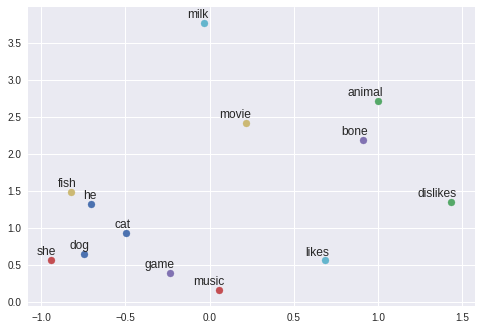

In [0]:
### Visualise result
for i, label in enumerate(word_list):
    x, y = trained_embeddings[i]
    print (label, " : ", x, " " , y)
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')

plt.show()


# Scikit-learn (sklearn) & pandas package

[sklearn](https://scikit-learn.org/stable/modules/classes.html) and [pandas](http://pandas.pydata.org/pandas-docs/stable/reference/index.html) are powerful tools for data mining and data analysis.

First, download tagged movie plots data.


In [0]:
# Code to download file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id = '1x1BE_N8kCKDT9zo60DQPIjURy_-c5ULW'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('tagged_plots_movielens.csv')  

    100% |████████████████████████████████| 993kB 21.0MB/s 


## pandas
You can use pandas to read csv file and show data distribution.

In [0]:
import pandas as pd
import numpy as np

df = pd.read_csv('tagged_plots_movielens.csv')
#remove mnissing values
df = df.dropna()

['animation' 'fantasy' 'comedy' 'action' 'romance' 'sci-fi']


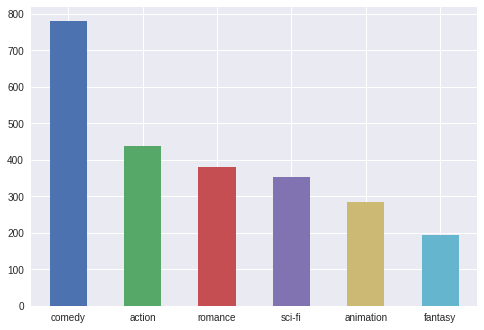

In [0]:
my_tags = df.tag.unique()
print(my_tags)

# plot "tag" of dataframe (df) which is converted (returned by read_csv()) from "tagged_plots_movielens.csv" file
df.tag.value_counts().plot(kind="bar", rot=0)

## Scikit-learn



### Data Split for evaluation (Training & Testing)
** [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)** splits arrays or matrices into random train and test subsets.

In [0]:
from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


train_data, test_data = train_test_split(df, test_size=0.1, random_state=42)

### Confusion Matrix with TFIDF Vector


You can use [confusion matrix](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py) to show the prediction result:


![Tensor_Rank](https://drive.google.com/uc?id=11qxpox8m6koNvxcM0EGil9WC88EQE5L0)


**TFIDFVectorizer**

**[TFIDFVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)** converts a collection of raw documents to a matrix of TF-IDF features.


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

import matplotlib.pyplot as plt

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
tf_vect = TfidfVectorizer(
    min_df=2, tokenizer=nltk.word_tokenize,
    preprocessor=None, stop_words='english')
train_data_features = tf_vect.fit_transform(train_data['plots'])


**Classifier** - [Multi Layer Perceptron (MLPClassifier)](https://scikit-learn.org/stable/modules/neural_networks_supervised.html)


In [0]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)

mlp.fit(train_data_features, train_data['tag']) 


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [0]:
from sklearn.metrics import accuracy_score, confusion_matrix


In [0]:
tf_vect.get_feature_names()[5000:5010]

['pleasant',
 'pleasure',
 'pledge',
 'pledges',
 'plenty',
 'plot',
 'plots',
 'plotting',
 'plus',
 'po']

In [0]:
def display_confusion_matrix(vectorizer, classifier, data):
  
    data_features = vectorizer.transform(data['plots'])
    predictions = classifier.predict(data_features)
    target = data['tag']
    
    cm = confusion_matrix(target, predictions)
    
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion matrix")
    plt.colorbar()
    tick_marks = np.arange(len(my_tags))
    target_names = my_tags
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

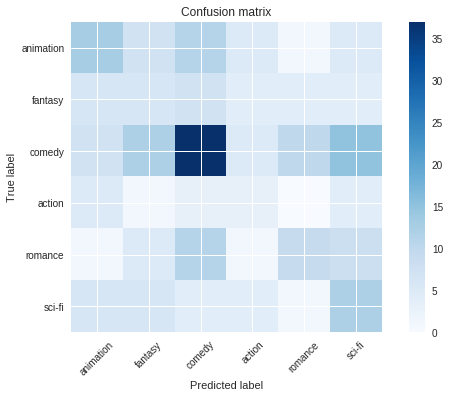

In [0]:
display_confusion_matrix(tf_vect, mlp, test_data)

# Exercise

**You are required to write two functions: **

*   **generate_models() : which generates each Word2Vec model for six genres ("tag" column) of the movie using "plot" data ([Remove stop words](https://radimrehurek.com/gensim/parsing/preprocessing.html#gensim.parsing.preprocessing.remove_stopwords)). 
  The generated models should be returned by the function.**
  
    Return: A dictionary (key: name of  genre, 'tag' & value: generated model) 
    
*   **get_vector(model, word) : which returns a vector of the given word in the given model (model - i.e. models["sci-fi"]). If the given word is not included in the vocabulary list, return None ** 
  
    Return : An array (vector of word embeddings)




In [0]:
# You should submit "ipynb" file (You can download it from "File" > "Download .ipynb") to Canvas
# Please include the required libraries


def generate_models():
  models = {}
    
    
  return models


def get_vector(model, word):
  vector = None
  
  
  return vector


models = generate_models()
vector = get_vector(models["sci-fi"], "not_exist")

print(vector)

vector = get_vector(models["sci-fi"], "mars")

print(vector)